# 创建分类器

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model as lm

In [18]:
X = np.array([[1, 2], [3, -5], [4, 6], [3, 4], [9, 0], [1, 5], [7, 3], [5, 9], [0, 6], [7, 0]])
y = [1, 0, 1, 1, 0, 1, 0, 1, 1, 0]

# 位于y = x以上的部分为1，以下的部分为0

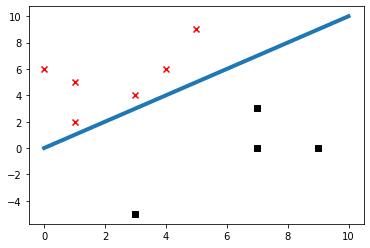

In [21]:
# 把样本数据分成两类
class_0 = np.array([X[i] for i in range(len(X)) if y[i]==0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i]==1])


plt.scatter(class_0[:, 0], class_0[:, 1], color='black', marker='s')
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', marker='x')
plt.plot([0, 10], [0, 10], linewidth=4)
plt.show()

## 创建分类器

In [24]:
classifier = lm.LogisticRegression(solver='liblinear', C=100)  # 算法类型，正则化强度（越小强度越高）
classifier.fit(X, y)

LogisticRegression(C=100, solver='liblinear')

## 画图

/var/folders/3k/hd12ckqx7pj1sxt3j9q7qrsm0000gn/T/ipykernel_96734/1675083720.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)


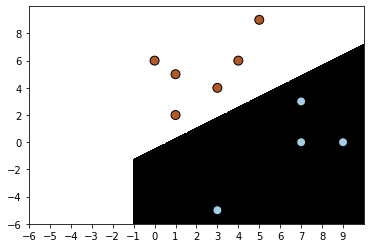

In [25]:
def plot_classifier(classifier, X, y):
    # 定义图形取值范围
    x_min, x_max = min(X[:, 0]) - 1, max(X[:, 0]) + 1
    y_min, y_max = min(X[:, 1]) - 1, max(X[:, 1]) + 1

    # 设置step
    step_size = 0.01
    # 定义网格
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size),
                                     np.arange(y_min, y_max, step_size))
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])  # 计算分类器输出结果
    mesh_output = mesh_output.reshape(x_values.shape)  # 数组维度变形

    # 画出分类结果
    plt.figure()
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidths=1, cmap=plt.cm.Paired)

    # 图形取值范围
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # 设置x，y轴
    plt.xticks((np.arange(int(min(X[:, 0]) - 1), int(max(X[:, 0]) + 1), 1.0)))
    plt.xticks((np.arange(int(min(X[:, 1]) - 1), int(max(X[:, 1]) + 1), 1.0)))

    plt.show()

plot_classifier(classifier, X, y)